## Import necessary libraries. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer

## Read data file

In [8]:
d = pd.read_csv('bankruptcy.csv')
#Replace the categorical column values into binary
d['class']=pd.Categorical(d['class'].replace({"b'0'" : 0, "b'1'":1}))
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Attr1   10503 non-null  float64 
 1   Attr2   10503 non-null  float64 
 2   Attr3   10503 non-null  float64 
 3   Attr4   10485 non-null  float64 
 4   Attr5   10478 non-null  float64 
 5   Attr6   10503 non-null  float64 
 6   Attr7   10503 non-null  float64 
 7   Attr8   10489 non-null  float64 
 8   Attr9   10500 non-null  float64 
 9   Attr10  10503 non-null  float64 
 10  Attr11  10503 non-null  float64 
 11  Attr12  10485 non-null  float64 
 12  Attr13  10460 non-null  float64 
 13  Attr14  10503 non-null  float64 
 14  Attr15  10495 non-null  float64 
 15  Attr16  10489 non-null  float64 
 16  Attr17  10489 non-null  float64 
 17  Attr18  10503 non-null  float64 
 18  Attr19  10460 non-null  float64 
 19  Attr20  10460 non-null  float64 
 20  Attr21  9696 non-null   float64 
 21  Attr22  1050

In [9]:
# Change the class variable from categorical to integer
d['class']= pd.Categorical(d['class']).codes

In [10]:
# Find the number of null values in all columns
#for col in d.columns:
#    null_val = d[col].isna().sum()
#    if null_val > 0
#        print(f"Null values in {col} is {null_val}")     

# Find 10 columns with most null values
print(d.isnull().sum().sort_values(ascending=False).head(20))        

Attr37    4736
Attr21     807
Attr27     715
Attr60     592
Attr45     591
Attr28     228
Attr53     228
Attr54     228
Attr64     228
Attr24     227
Attr41     202
Attr32     101
Attr47      86
Attr52      86
Attr30      43
Attr20      43
Attr49      43
Attr23      43
Attr56      43
Attr39      43
dtype: int64


<BarContainer object of 65 artists>

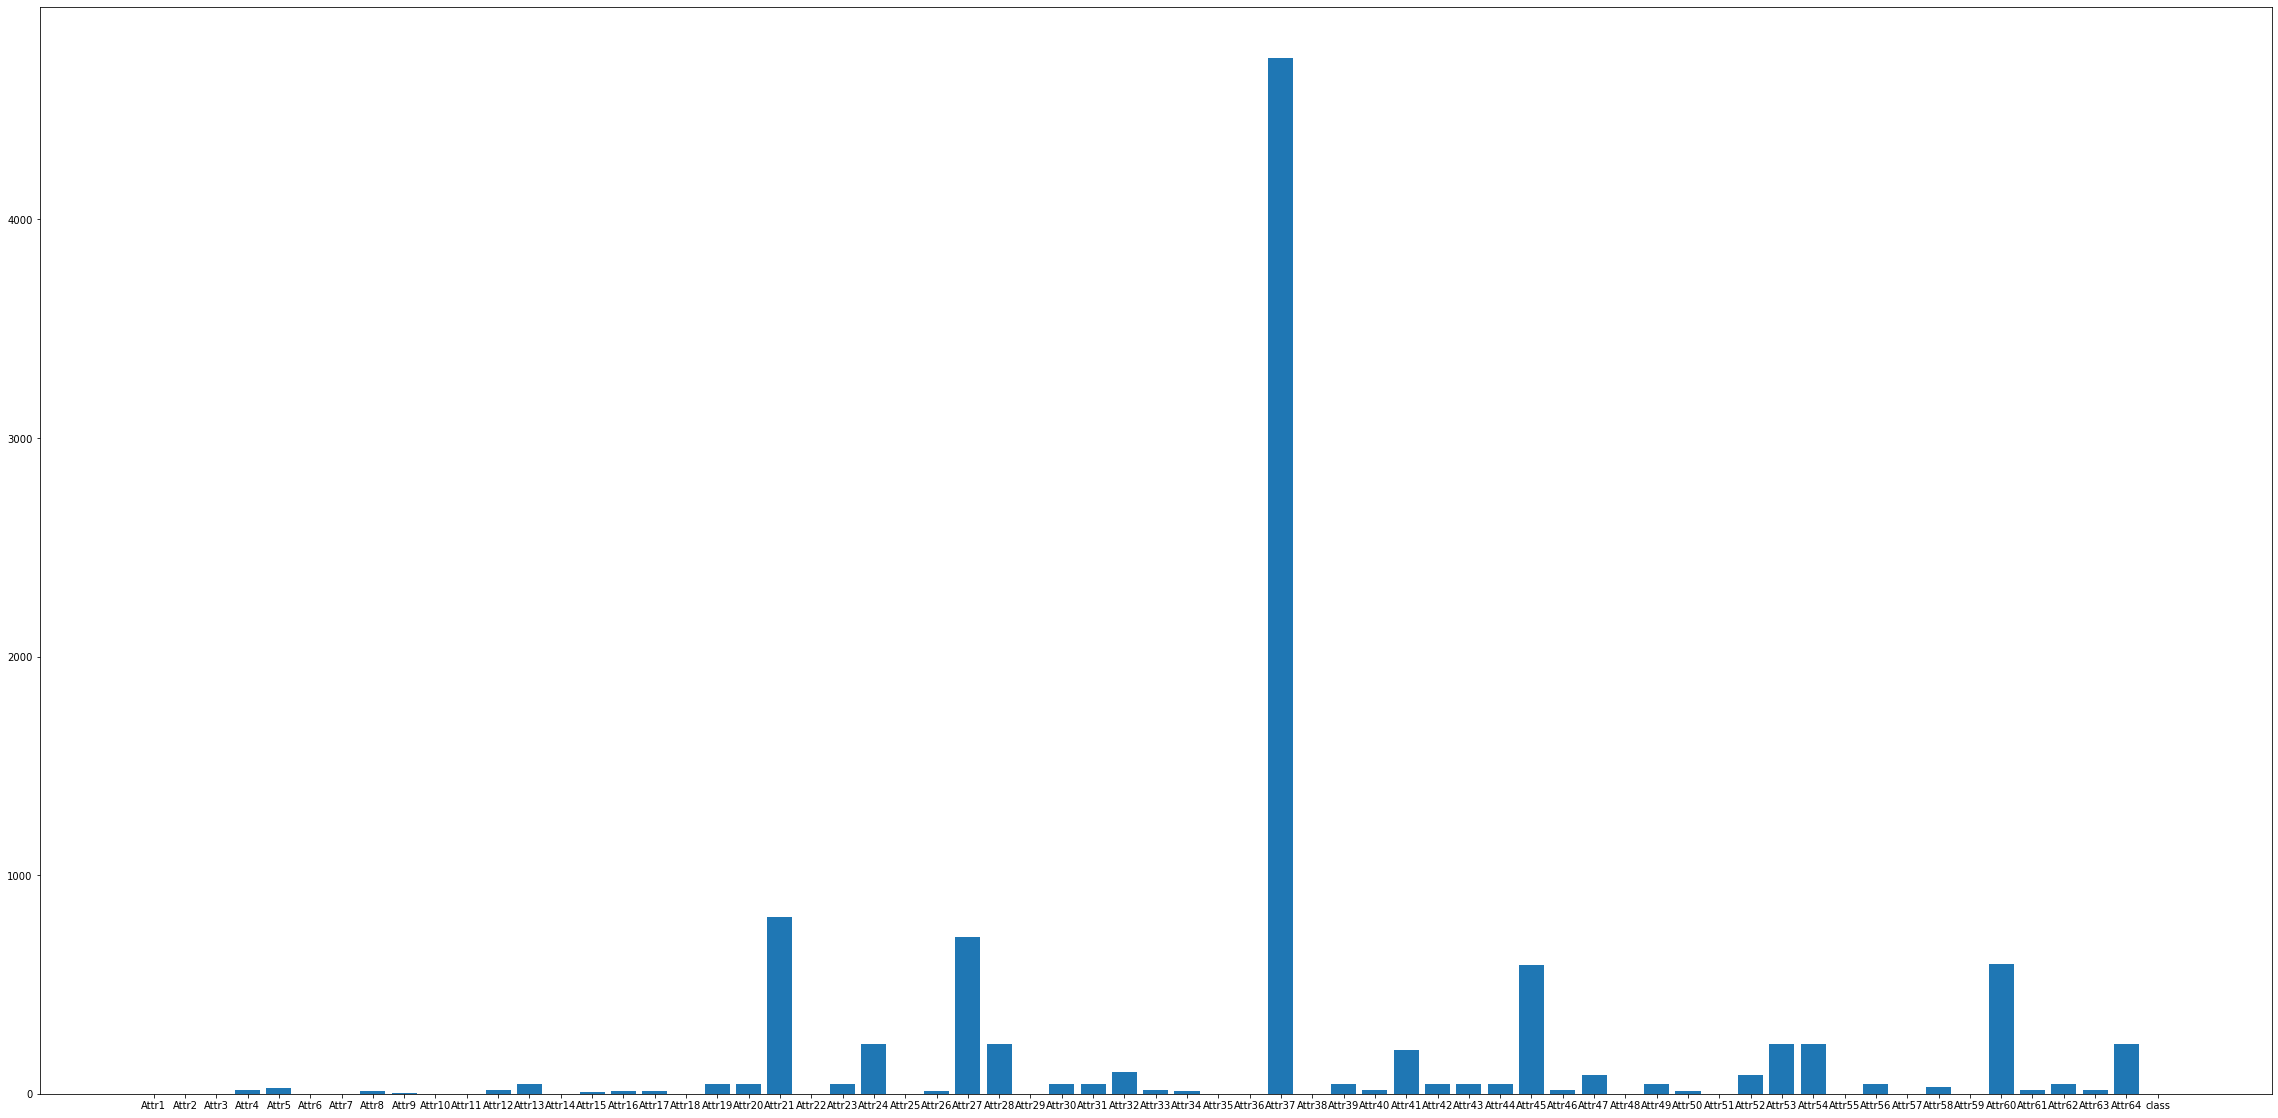

In [11]:
#count the number of  null values in Dataset and plot a bargraph
d = d.replace('', np.nan)
nan_columns = []
nan_values = []

for column in d.columns:
    nan_columns.append(column)
    nan_values.append(d[column].isnull().sum())

fig, ax = plt.subplots(figsize=(40,20))
plt.bar(nan_columns, nan_values)

#### Column Attr37 contains the heighest number of null values and data imputation on the column will nto be useful. Remove the column and plot the bar graph again

In [12]:
# Delete the column with highest number of null values ie Column Attr37
d = d.drop(columns = ['Attr37'])
# Find 10 columns with most null values
print(d.isnull().sum().sort_values(ascending=False).head(20))

Attr21    807
Attr27    715
Attr60    592
Attr45    591
Attr64    228
Attr28    228
Attr54    228
Attr53    228
Attr24    227
Attr41    202
Attr32    101
Attr47     86
Attr52     86
Attr56     43
Attr23     43
Attr49     43
Attr19     43
Attr20     43
Attr39     43
Attr31     43
dtype: int64


<BarContainer object of 64 artists>

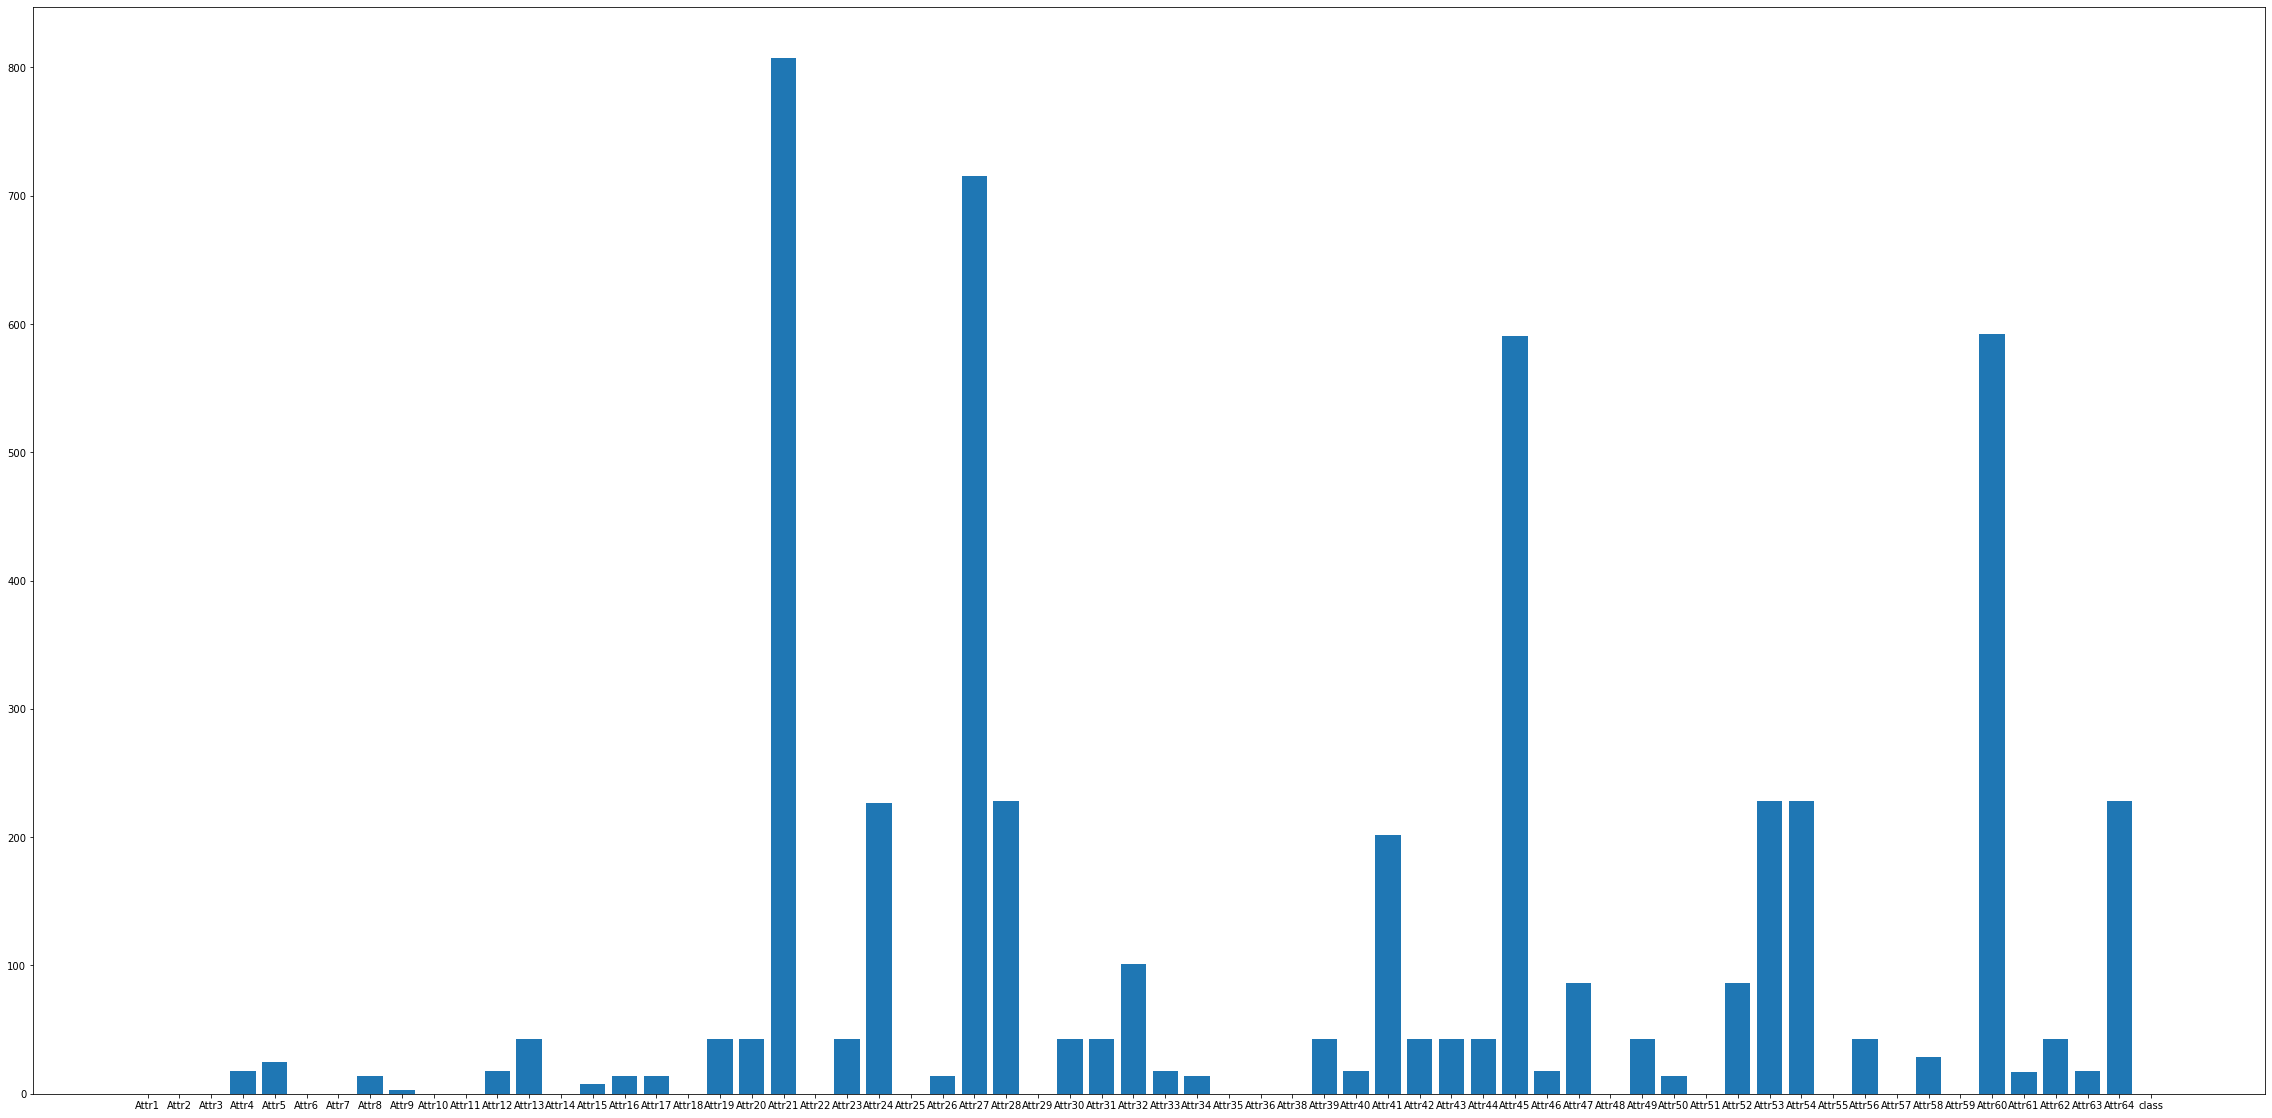

In [13]:
# Plot the null values graph after removing the Attr37 column
nan_columns = []
nan_values = []

for column in d.columns:
    nan_columns.append(column)
    nan_values.append(d[column].isnull().sum())

fig, ax = plt.subplots(figsize=(40,20))
plt.bar(nan_columns, nan_values)

## Data Imputation

In [14]:
#Data imputation via mean
d_imp1 = d
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') 
mean_imp_df = pd.DataFrame(imp.fit_transform(d_imp1))
mean_imp_df
#null_val = mean_imp_df.columns[mean_imp_df.isna().any()].tolist()
mean_imp_df[[21,27,59]].describe().round(5)           ##Check details for imputed columns Attr21, Attr27, Attr60

,21,27,59
count,10503.00000,10503.00000,10503.00000
mean,0.07568,6.09288,13.93536
std,0.58173,93.67999,83.63633
min,-17.69200,-690.40000,-6.59030
25%,0.00000,0.03597,4.49060
50%,0.05463,0.48430,6.68090
75%,0.14589,1.69945,10.63950
max,47.59700,6233.30000,4470.40000


In [19]:
#Data imputation via median
d_imp2 = d
imp = SimpleImputer(missing_values = np.nan, strategy = 'median') 
median_imp_df = pd.DataFrame(imp.fit_transform(d_imp2))
median_imp_df
median_imp_df[[21,27,59]].describe().round(5)        ##Check details for imputed columns Attr21, Attr27, Attr60

,21,27,59
count,10503.00000,10503.00000,10503.00000
mean,0.07568,5.97060,13.92361
std,0.58173,93.68358,83.63684
min,-17.69200,-690.40000,-6.59030
25%,0.00000,0.03597,4.49060
50%,0.05463,0.45993,6.67730
75%,0.14589,1.51435,10.57700
max,47.59700,6233.30000,4470.40000


In [13]:
#Data imputation via mode
d_imp3 = d
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent') 
freq_imp_df = pd.DataFrame(imp.fit_transform(d_imp3))
freq_imp_df
freq_imp_df[[21,27,59]].describe().round(5)           #Check details for imputed columns Attr21, Attr27, Attr60

,21,27,59
count,10503.00000,10503.00000,10503.00000
mean,0.07568,5.96273,13.91281
std,0.58173,93.68406,83.63820
min,-17.69200,-690.40000,-6.59030
25%,0.00000,0.03597,4.47825
50%,0.05463,0.43417,6.66890
75%,0.14589,1.51435,10.57700
max,47.59700,6233.30000,4470.40000


<AxesSubplot:>

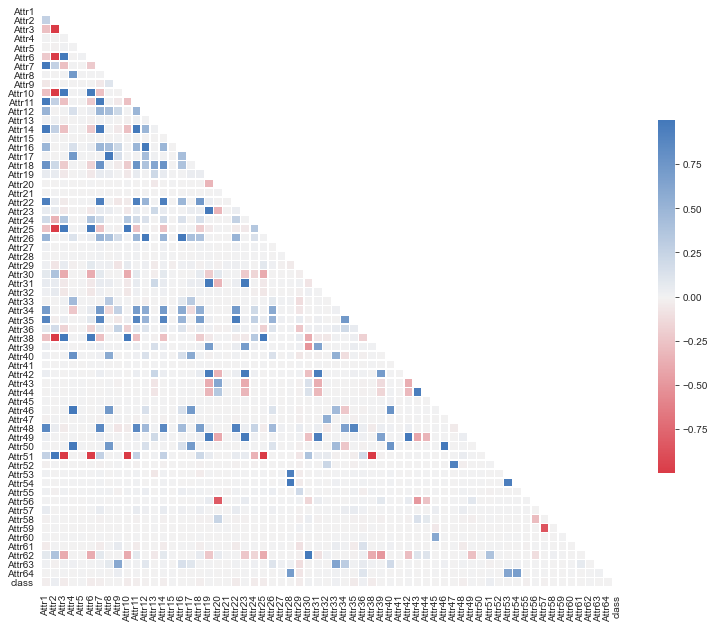

In [41]:
#Check Correlation matrix of mean imputed data
corr = mean_imp_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 13))
sns.set_style(style="white")
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr , mask=mask, cmap=cmap,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            ax= ax , 
            xticklabels = d.columns.tolist(),
            yticklabels = d.columns.tolist()) 
           

<AxesSubplot:>

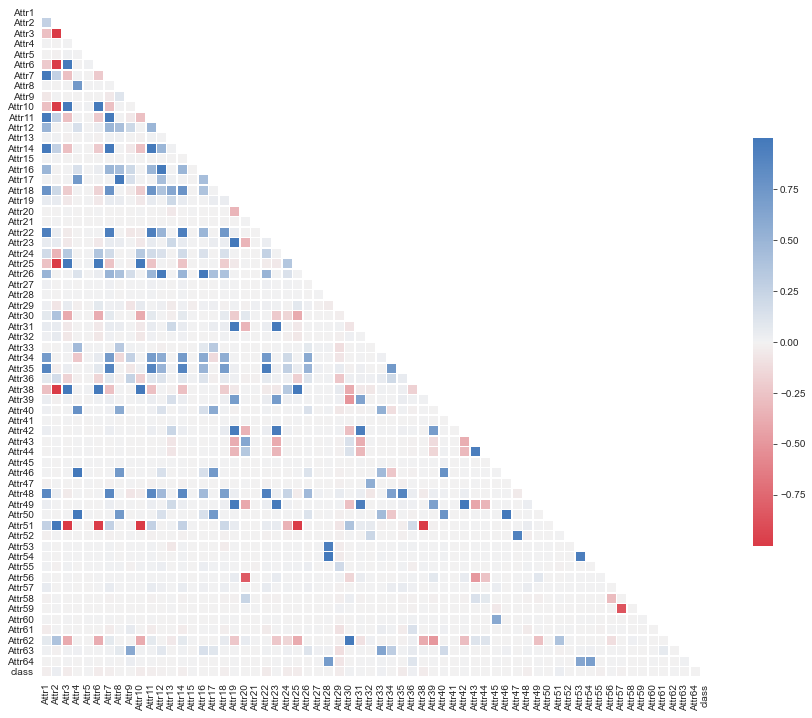

In [37]:
#Check Correlation matrix of median imputed data


corr = median_imp_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.set_style(style="white")
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask,
            cmap=cmap,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            ax= ax,
            xticklabels = d.columns.tolist(),
            yticklabels = d.columns.tolist())

<AxesSubplot:>

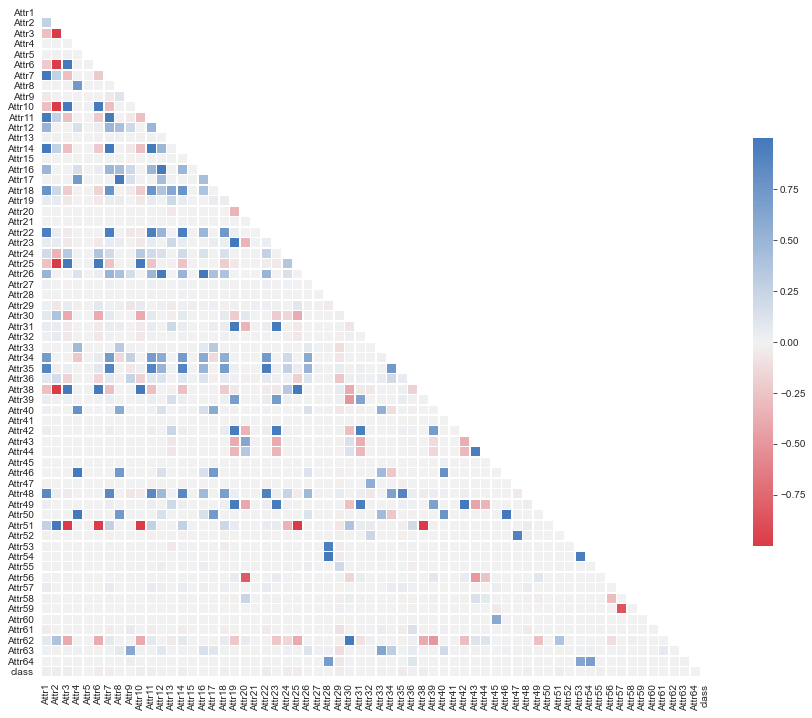

In [39]:
#Check Correlation matrix of mode imputed data

corr = freq_imp_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.set_style(style="white")
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, 
            cmap=cmap,
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .5},
            ax= ax,
            xticklabels = d.columns.tolist(),
            yticklabels = d.columns.tolist())

Columns with attributes 1,7,11,14,22,35,48 show positive correlation(>0.8)
Columns with attributes 3,6,10,25,38,51    show negative correlation(<-0.8)

Attributes positive correlation: 
1. Attr1 -net profit / total assets
2. Attr7 -EBIT(Earnings before interest and taxes) / total assets
3. Attr11-(gross profit + extraordinary items + financial expenses) / total assets
4. Attr14-(gross profit + interest) / total assets
5. Attr22- profit on operating activities / total assets
6. Attr35-profit on sales / total assets
7. Attr48-EBITDA (profit on operating activities - depreciation) / total assets



Attributes negative correlation:
1. Attr3 -working capital / total assets
2. Attr6 -retained earnings / total assets
3. Attr10-equity / total assets
4. Attr25-(equity - share capital) / total assets
5. Attr38-constant capital / total assets
6. Attr51-short-term liabilities / total assets


Take the median amputed data and remove the outliers based on the above attributes. 

In [56]:
new_df =  median_imp_df[[1,3,6,7,10,11,14,22,25,35,38,48]]
print(f'Before removing outliers shape is ', new_df.shape)
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR  
new_df = new_df[~((new_df<lower)|(new_df>upper)).any(axis = 1)]
print(f'After removing outliers shape is ', new_df.shape)

Before removing outliers shape is  (10503, 12)
After removing outliers shape is  (5253, 12)


Text(0.5, 0, 'sales / total assets')

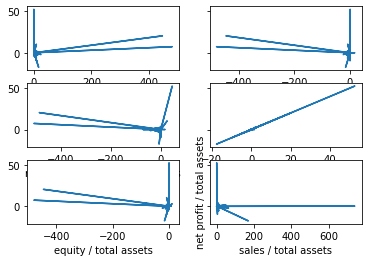

In [47]:
fig, ax = plt.subplots(3,2,sharey=True)
ax[0,0].plot(d["Attr2"], d['Attr1'])
ax[0,0].set_xlabel("total liabilities / total assets")

ax[0,1].plot(d["Attr3"], d['Attr1'])
ax[0,1].set_xlabel("working capital / total assets")

ax[1,0].plot(d["Attr6"], d['Attr1'])
ax[1,0].set_xlabel("retained earnings / total assets")

ax[1,1].plot(d["Attr7"], d['Attr1'])
ax[1,1].set_xlabel("EBIT/ total assets")

ax[2,0].plot(d["Attr10"], d['Attr1'])
ax[2,0].set_xlabel("equity / total assets")

ax[2,1].plot(d["Attr9"], d['Attr1'])
ax[2,1].set_ylabel('net profit / total assets')
ax[2,1].set_xlabel("sales / total assets")

In [58]:
d2 = d[['Attr1','Attr2','Attr3', 'Attr6', 'Attr7', 'Attr10']]

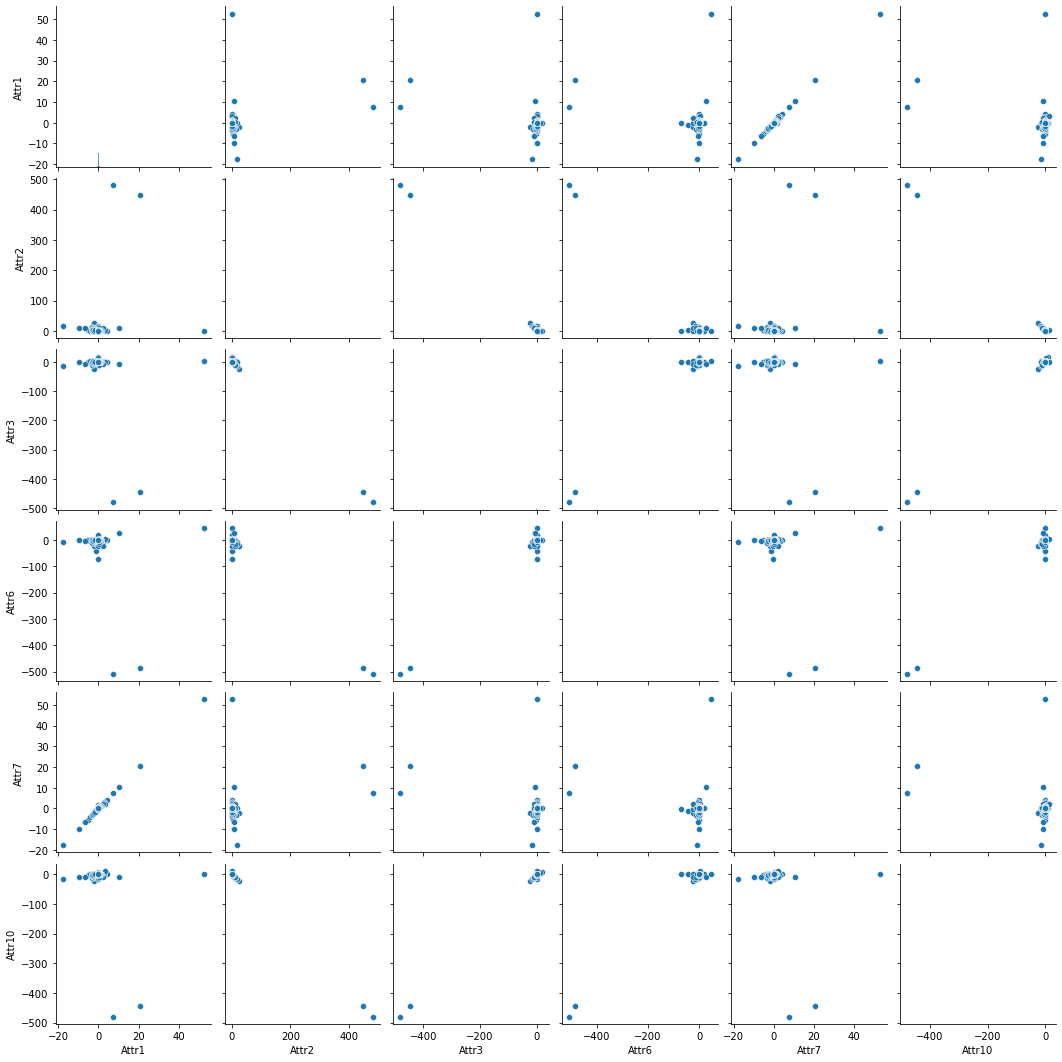

In [56]:
sns.pairplot(d2)

array([[<AxesSubplot:xlabel='Attr1', ylabel='Attr1'>,
        <AxesSubplot:xlabel='Attr2', ylabel='Attr1'>,
        <AxesSubplot:xlabel='Attr3', ylabel='Attr1'>,
        <AxesSubplot:xlabel='Attr6', ylabel='Attr1'>,
        <AxesSubplot:xlabel='Attr7', ylabel='Attr1'>,
        <AxesSubplot:xlabel='Attr10', ylabel='Attr1'>],
       [<AxesSubplot:xlabel='Attr1', ylabel='Attr2'>,
        <AxesSubplot:xlabel='Attr2', ylabel='Attr2'>,
        <AxesSubplot:xlabel='Attr3', ylabel='Attr2'>,
        <AxesSubplot:xlabel='Attr6', ylabel='Attr2'>,
        <AxesSubplot:xlabel='Attr7', ylabel='Attr2'>,
        <AxesSubplot:xlabel='Attr10', ylabel='Attr2'>],
       [<AxesSubplot:xlabel='Attr1', ylabel='Attr3'>,
        <AxesSubplot:xlabel='Attr2', ylabel='Attr3'>,
        <AxesSubplot:xlabel='Attr3', ylabel='Attr3'>,
        <AxesSubplot:xlabel='Attr6', ylabel='Attr3'>,
        <AxesSubplot:xlabel='Attr7', ylabel='Attr3'>,
        <AxesSubplot:xlabel='Attr10', ylabel='Attr3'>],
       [<AxesSubplot:x

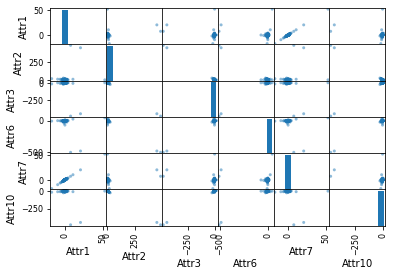

In [57]:
pd.plotting.scatter_matrix(d2)

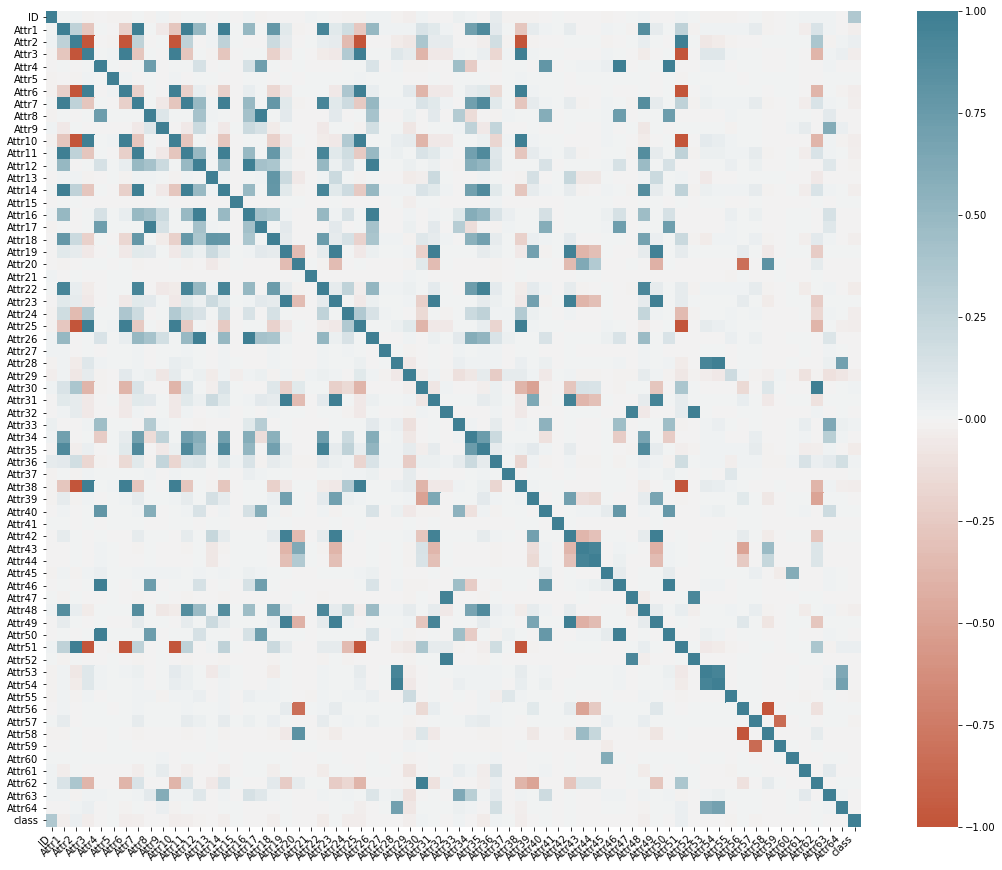

In [77]:
corr = d.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()